# MATH 210 Introduction to Mathematical Computing

## October 30, 2020

* Simpson's Rule

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## SImpson's Rule

Write a function called `simpsons` which takes input parameters `f`, `a`, `b` and `N` and returns the approximation by Simpson's rule of the integral

$$
\int_a^b f(x) dx
$$

$$
S_N(f) = \frac{\Delta x}{3} \sum_{n=1}^{N/2} (f(x_{2n - 2}) + 4f(x_{2n - 1}) + f(x_{2n}))
$$

In [2]:
def simpsons(f,a,b,N):
    if N % 2 != 0:
        print('N must be even.')
        return None
    dx = (b - a)/N
    x = np.linspace(a,b,N+1)
    I = np.sum(f(x[0:-1:2]) + 4*f(x[1::2]) + f(x[2::2]))*dx/3
    return I

In [3]:
def f(x):
    return np.cos(x)

a = 0
b = np.pi/2
N = 100

I = simpsons(f,a,b,N)

print(I)

1.0000000003382359


In [4]:
import scipy.integrate as spi

In [5]:
def f(x):
    return np.cos(x)

a = 0
b = np.pi/2
N = 100
x = np.linspace(a,b,N+1)
y = f(x)
I = spi.simps(y,x)
print(I)

1.0000000003382359


Now let's compute

$$
\int_0^1 e^{-x^2} dx
$$

We have seen that we need $N \geq 429$ for left Riemann sums to have error less than $0.001$. The error formula for Simpson's rule is

$$
E_N^S(f) = \left| \int_a^b f(x) dx - S_N(f) \right| \leq \frac{(b - a)^5}{180 N^4} f^{(4)}(x)
$$

Compute the derivatives of $f(x) = e^{-x^2}$:

\begin{align*}
f'(x) &= -2x e^{-x^2} \\
f''(x) &= (4x^2 - 2) e^{-x^2} \\
f'''(x) &= (12x - 8x^3) e^{-x^2} \\
f''''(x) &= (16x^4 - 48x^2 + 12) e^{-x^2}
\end{align*}

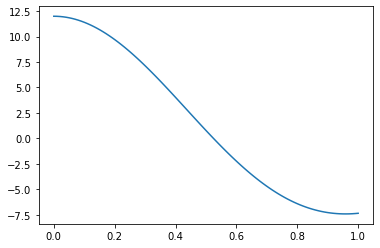

In [6]:
x = np.linspace(0,1,100)
d4f = (16*x**4 - 48*x**2 + 12)*np.exp(-x**2)
plt.plot(x,d4f)
plt.show()

Therefore $|f''''(x)|\leq 12$ for $x \in [0,1]$. To guarantee $E_N^S(f) \leq 0.001$ we need

$$
E_N^S(f) \leq \frac{1}{180 N^4} 12 \leq 0.001 \ \Rightarrow \ N \geq \sqrt[4]{\frac{1}{180 (0.001)} 12}
$$

In [7]:
(1/180/0.001*12)**0.25

2.8574404296987996

We need an even number of subintervals therefore $N=4$. Wow!

In [8]:
def f(x):
    return np.exp(-x**2)

a = 0
b = 1
N = 4
x = np.linspace(a,b,N+1)
y = f(x)
I = spi.simps(y,x)
print(I)

0.7468553797909873
